# Guided Project: Storytelling Data Visualization on Exchange Rates

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).

Daria Chemkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) — the data source is the European Central Bank. Note that the dataset gets regular updates — we downloaded it on January 2021.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5781 non-null   object 
 1   [Australian dollar ]      5781 non-null   object 
 2   [Bulgarian lev ]          5379 non-null   object 
 3   [Brazilian real ]         5513 non-null   object 
 4   [Canadian dollar ]        5781 non-null   object 
 5   [Swiss franc ]            5781 non-null   object 
 6   [Chinese yuan renminbi ]  5513 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5781 non-null   object 
 9   [Danish krone ]           5781 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5781 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5781 non-null   object 
 14  [Croatia

What is the number of rows and columns?
Are there null values?
What is the data type of each column?

In [2]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-05-06,1.5547,1.9558,6.4707,1.4764,1.0953,7.8054,NaN,25.847,7.4360,...,4.9264,89.8825,10.1940,1.6096,NaN,NaN,37.712,10.0490,1.2060,17.2081
1,2021-05-05,1.5510,1.9558,6.5174,1.4731,1.0965,7.7636,NaN,25.825,7.4360,...,4.9271,89.7964,10.1945,1.6035,NaN,NaN,37.366,10.0174,1.2005,17.3013
2,2021-05-04,1.5608,1.9558,6.5785,1.4836,1.0980,7.8136,NaN,25.841,7.4361,...,4.9275,90.2438,10.1673,1.6073,NaN,NaN,37.475,10.0110,1.2021,17.4433
3,2021-05-03,1.5573,1.9558,6.5507,1.4807,1.1016,7.7967,NaN,25.773,7.4365,...,4.9269,90.7472,10.1803,1.6044,NaN,NaN,37.565,10.0087,1.2044,17.3953
4,2021-04-30,1.5581,1.9558,6.4597,1.4834,1.0998,7.8134,NaN,25.883,7.4360,...,4.9285,90.7108,10.1640,1.6045,NaN,NaN,37.648,9.9777,1.2082,17.3875


 - We rename the [US dollar ] and Period\Unit: columns to something easier to type — US_dollar and Time.
 - We change the Time column to a datetime data type.
 - We sort the values by Time in ascending order.
 - We reset the index (and drop the initial index).

In [3]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [4]:
euro_to_dollar = exchange_rates[['Time','US_dollar']].copy()

In [5]:
euro_to_dollar['US_dollar'].value_counts(dropna=False)

-         62
1.2276     9
1.1215     8
1.1305     7
1.1193     6
          ..
0.9991     1
1.3139     1
1.0255     1
1.2750     1
1.3951     1
Name: US_dollar, Length: 3549, dtype: int64

In [6]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype('float')

In [7]:
euro_to_dollar.head()

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659


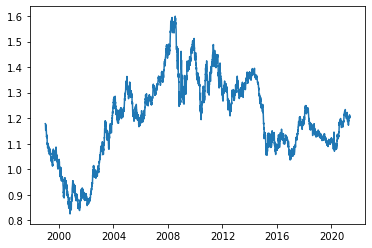

In [8]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

Depending on our goals, we may not want to show that daily variation on our graph. If we want to hide it and show only the long-term trends, we can use the rolling mean (also known as the moving average).



In [9]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.

We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.

We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

First, we need to choose the right graph type. The graph should give our story the visual form it needs — we don't want to choose a histogram to visually represent a time series.

Equally important, we need to choose something that our audience will be familiar with. To simplify your work, you can choose any audience you want for your graph.

Next, we're going to sketch the graph — we do this before writing the code. In sketching the graph, it's important to use some of the principles we've learned so far:

Maximize the data-ink ratio.
Create visual patterns using Gestalt principles.
Guide the audience's attention using pre-attentive attributes.


Using pen and paper, sketch the graph you want to create.